# Import data and preprocess it

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

use_all_features = True
use_full_data = True
test_sml_size = 3000

In [2]:
#file paths 

train_sig_path_sml = "data/train_sml_sig.csv"
train_bg_path_sml = "data/train_sml_bg.csv"
train_sig_path = "data/train_sig.csv"
train_bg_path = "data/train_bg.csv"
test_sig_path = "data/test_sig.csv"
test_bg_path = "data/test_bg.csv"

#read csv
train_sig_sml = pd.read_csv(train_sig_path_sml, header=0)
train_bg_sml = pd.read_csv(train_bg_path_sml, header=0)
train_sig = pd.read_csv(train_sig_path, header=0)
train_bg = pd.read_csv(train_bg_path, header=0)
test_sig = pd.read_csv(test_sig_path, header=0)
test_bg = pd.read_csv(test_bg_path, header=0)

#merge sig and bg dataframes
all_data_train_sml = train_bg_sml.append(train_sig_sml)
all_data_train = train_bg.append(train_sig)
all_data_test = test_bg.append(test_sig)

#one hot encode the labels -> i get two new features: Label_b and Label_s
all_data_train_sml_one_hot = pd.get_dummies(all_data_train_sml)
all_data_train_one_hot = pd.get_dummies(all_data_train)
all_data_test_one_hot = pd.get_dummies(all_data_test)

#two distinct arrays of deatures
listOfSelectedFeatures = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_tot", "DER_sum_pt",
                          "PRI_tau_pt", "PRI_lep_pt", "PRI_met"]
listOfAllFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet',
                     'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
                     'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt',
                     'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
                     'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
                     'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']



#create numpy arrays containing the data
if use_all_features is True:

    X_train_raw_full = all_data_train_one_hot[listOfAllFeatures].values
    X_train_raw_sml = all_data_train_sml_one_hot[listOfAllFeatures].values

    X_test_raw_full = all_data_test_one_hot[listOfAllFeatures].values

    #select onlya certain number of points from the test dataset 
    perm = np.arange(len(X_test_raw_full))
    np.random.shuffle(perm)
    X_test_raw_sml = all_data_test_one_hot[listOfAllFeatures].values[perm[:test_sml_size]]
else:
    X_train_raw_full = all_data_train_one_hot[listOfSelectedFeatures].values
    X_train_raw_sml = all_data_train_sml_one_hot[listOfSelectedFeatures].values

    X_test_raw_full = all_data_test_one_hot[listOfSelectedFeatures].values

    #select onlya certain number of points from the test dataset
    perm = np.arange(len(X_test_raw_full))
    np.random.shuffle(perm)
    X_test_raw_sml = all_data_test_one_hot[listOfSelectedFeatures].values[perm[:test_sml_size]]


y_train_full = all_data_train_one_hot[["Label_b", "Label_s"]].values
y_train_sml = all_data_train_sml_one_hot[["Label_b", "Label_s"]].values

y_test_full = all_data_test_one_hot[["Label_b", "Label_s"]].values
y_test_sml = y_test_full[perm[:test_sml_size]]


### select which dataset to use and scale it

In [3]:
#select dataset based on preference stated before
if use_full_data is True:
    X_train_to_scale = X_train_raw_full
    X_test_to_scale = X_test_raw_full
    y_train = y_train_full
    y_test = y_test_full
else:
    X_train_to_scale = X_train_raw_sml
    X_test_to_scale = X_test_raw_sml
    y_train = y_train_sml
    y_test = y_test_sml


In [4]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# split data in training and validation set, obsolete as I've implemented it in the fit subroutine, 
# I've decided to keep it as it may prove to be usefull for further analysis
split_val = False

if split_val is True:
    #split training data in train and val set
    X_train_to_scale, X_val_to_scale, y_train, y_val = train_test_split(X_train_to_scale, y_train, test_size=0.1)

    #rescale data
    #scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = StandardScaler() #scale the features to have 0 mean and unit variance
    scaler.fit(X_train_to_scale)

    X_train = scaler.transform(X_train_to_scale)
    X_val = scaler.transform(X_val_to_scale)
    X_test = scaler.transform(X_test_to_scale)

    n_features = X_train.shape[1]

else:
    #X_train_to_scale, y_train = X_train_to_scale , y_train

    #rescale data
    #scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = StandardScaler()
    scaler.fit(X_train_to_scale)

    X_train = scaler.transform(X_train_to_scale)
    X_test = scaler.transform(X_test_to_scale)

    n_features = X_train.shape[1]


In [5]:
print(X_train.shape)
#print(X_val.shape)
print(X_test.shape)


(250000, 30)
(100000, 30)


In [6]:
print(y_train.shape)
print(y_test.shape)


(250000, 2)
(100000, 2)


# Data analisys

In [7]:
#check if data has been imported correctly
print("X_train:\n{}\nshape={}\n".format(X_train, X_train.shape))
print("y_train:\n{}\nshape={}\n".format(y_train, y_train.shape))
#print("X_val:\n{}\nshape={}\n".format(X_val,X_val.shape))
#print("y_val:\n{}\nshape={}\n".format(y_val,y_val.shape))
print("X_test:\n{}\nshape={}\n".format(X_test, X_test.shape))
print("y_test:\n{}\nshape={}\n".format(y_test, y_test.shape))


X_train:
[[ 0.51670419  0.55250482  0.54013641 ... -0.63936657 -0.63936694
  -0.27381996]
 [-2.33785898  3.19515553  1.09655998 ... -0.63936657 -0.63936694
  -0.29396985]
 [ 0.47478905  0.9103791  -0.00585329 ... -0.63936657 -0.63936694
  -0.74543941]
 ...
 [ 0.4490769   0.80068833  0.19121441 ... -0.63936657 -0.63936694
  -0.02138021]
 [ 0.44075392 -1.28227632 -0.35271791 ...  1.56533987  1.55915785
   4.8257834 ]
 [ 0.38016991  0.31931645 -0.13086367 ... -0.63936657 -0.63936694
  -0.31701723]]
shape=(250000, 30)

y_train:
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
shape=(250000, 2)

X_test:
[[-2.33785898  0.85866005 -1.40259448 ... -0.63936657 -0.63936694
  -0.74543941]
 [ 0.29526911  0.48349894 -0.49553443 ... -0.63936657 -0.63936694
  -0.74543941]
 [ 0.22002514  0.76953807 -1.13121615 ... -0.63936657 -0.63936694
  -0.74543941]
 ...
 [ 0.30011475 -0.5528624  -0.92540458 ...  1.55834359  1.56533137
   1.62619651]
 [ 0.41409676 -1.31404902 -0.14854735 ...  1.56926811  1.56329338


# calculate AMS

In [8]:
#
def compute_AMS(model, X_test):
    """ 
    Compute theApproximate Median Significance, given a model and the X_test set. Hardcoded to work with my tensors, 
    one may want to modify it in order to make it work in a more general scenario. 
    
    Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm 
    """
    # define a matric which contains our predictions, 
    # following nomenclature suggestend on the kaggle higgs challenge webpage
    
    submission_matrix=[] 
    predictions=model.predict(X_test)
    #fill the matrix
    for i in np.arange(X_test.shape[0]):
        EventId=np.str(all_data_test_one_hot["EventId"].values[i])
    
        pred=predictions[i]
        if pred == 1:
            #signal
            label=1
        else:
            #background
            label=0
        submission_matrix.append(label)
    
    submission_matrix = np.array(submission_matrix)
    
    #matrix containing the labels and weights of the test dataset
    solution_matrix=[]
    #fill the matrix
    for i in np.arange(X_test.shape[0]):
    
        weight=np.float(all_data_test["Weight"].values[i])
    
        label_s=np.str(all_data_test["Label"].values[i])
        if label_s == "s":
            #signal
            label=1
        else:
            #bg
            label=0
        
        solution_matrix.append([label,weight])
    
    solution_matrix = np.array(solution_matrix)
    
    b=0.
    s=0.
    # create sum of the weights for b and s, following the AMS evaluation code provided by the challenge
    for i in np.arange(len(X_test)):
        if submission_matrix[i]==1:
            if solution_matrix[i,0]==1:
                s+=solution_matrix[i,1]
            elif solution_matrix[i,0]==0:
                b+=solution_matrix[i,1]
            else:
                print("shouldn't get there")
                
    

    br = 10.0
    radicand = 2 * ((s + b + br) * np.log(1.0 + s / (b + br)) - s)
    if radicand < 0:
        print('radicand is negative. Exiting')
        exit()
    else:
        #return ams value
        return np.sqrt(radicand)    

## import lib v6.2 with weight l2 regularization, decaying learning rate decay

In [9]:
from Aurelio_Amerio_MLPClassifier_lib_v6_3 import MLPClassifier

# model 1, 1 layer

In [34]:
learning_rate_1 = 0.001
keep_probs_1 = (0.8,)
batch_size_1 = 128
max_epochs_1 = 1000
beta_w_1 = 0
beta_b_1 = 0
display_step_1 = 10
n_features_1 = n_features
# %% create model with 1 hidden layers
model1 = MLPClassifier(n_layers=1, n_nodes=(256,), learning_rate=learning_rate_1, random_seed=None,
                          n_features=n_features_1, n_classes=2)
model1.fit(X_train=X_train, y_train=y_train, max_epochs=max_epochs_1,
           display_step=display_step_1, batch_size=batch_size_1, keep_probs=keep_probs_1, validation_split=0.1,
           beta_w=beta_w_1, beta_b=beta_b_1, verbose=True)


starting the fit
progress:   0.00%	train acc=0.6895	val acc=0.6820
progress:   1.00%	train acc=0.7631	val acc=0.7580
progress:   2.00%	train acc=0.7797	val acc=0.7620
progress:   3.00%	train acc=0.7814	val acc=0.7720
progress:   4.00%	train acc=0.7856	val acc=0.7690
progress:   5.00%	train acc=0.7911	val acc=0.7720
progress:   6.00%	train acc=0.7944	val acc=0.7660
progress:   7.00%	train acc=0.7967	val acc=0.7860
progress:   8.00%	train acc=0.8002	val acc=0.7890
progress:   9.00%	train acc=0.7981	val acc=0.7890
progress:  10.00%	train acc=0.7995	val acc=0.7920
progress:  11.00%	train acc=0.8017	val acc=0.7980
progress:  12.00%	train acc=0.8027	val acc=0.7900
progress:  13.00%	train acc=0.7996	val acc=0.7860
progress:  14.00%	train acc=0.8037	val acc=0.7920
progress:  15.00%	train acc=0.7982	val acc=0.7840
progress:  16.00%	train acc=0.7992	val acc=0.7840
progress:  17.00%	train acc=0.8055	val acc=0.7890
progress:  18.00%	train acc=0.8047	val acc=0.7950
progress:  19.00%	train acc=0.806

In [35]:
print("model1 accuracy on train set: {:.3f}".format(model1.score(X_train, y_train)))

print("model1 accuracy on validation set: {:.3f}".format(model1.score(model1.X_val, model1.y_val)))


model1 accuracy on train set: 0.822
model1 accuracy on validation set: 0.794


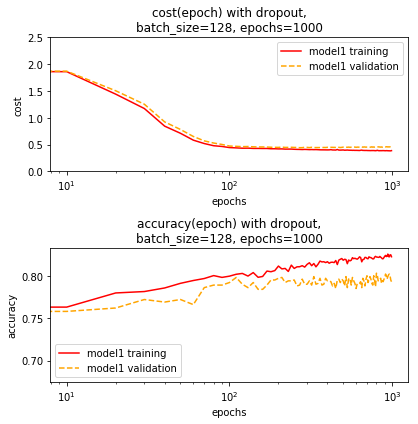

In [44]:
# %% plot results
fig1, axes = plt.subplots(2, 1, figsize=(6, 6))

x_ticks = np.arange(0, max_epochs_1, display_step_1)

#axes[0].plot(x_ticks, model1.training_costs, color="blue", label="model1 training")
#axes[0].plot(x_ticks, model1.val_costs, color="blue", label="model1 test",linestyle="dashed")
axes[0].plot(x_ticks, model1.training_costs, color="red", label="model1 training")
axes[0].plot(x_ticks, model1.val_costs, color="orange", label="model1 validation", linestyle="dashed")

axes[0].set_xlabel("epochs")
axes[0].set_xscale("log")
axes[0].set_ylabel("cost")
axes[0].set_yscale("linear")
axes[0].set_ylim(0,2.5)
axes[0].set_title(
    "cost(epoch) with dropout,\nbatch_size={}, epochs={}".format(batch_size_1, max_epochs_1))
axes[0].legend()

#axes[1].plot(x_ticks, model1.training_accuracy, color="blue", label="model1 training")
#axes[1].plot(x_ticks, model1.val_accuracy, color="blue", label="model1 test",linestyle="dashed")
axes[1].plot(x_ticks, model1.training_accuracy, color="red", label="model1 training")
axes[1].plot(x_ticks, model1.val_accuracy, color="orange", label="model1 validation", linestyle="dashed")

axes[1].set_xlabel("epochs")
axes[1].set_xscale("log")
axes[1].set_ylabel("accuracy")
axes[1].set_title(
    "accuracy(epoch) with dropout,\nbatch_size={}, epochs={}".format(batch_size_1, max_epochs_1))
axes[1].legend()

fig1.tight_layout()
plt.show()

fig1.savefig("higgs_fig1.png", dpi=500)


In [42]:
print("model1 accuracy on test set: {:.3f}".format(model1.score(X_test, y_test)))
#ams can be conputed only when the full dataset is used
#print("model1 AMS: {:.4f}".format(compute_AMS(model1, X_test)))

model1 accuracy on test set: 0.799


['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','DER_pt_ratio_lep_tau','DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt']

## Model2 

In [45]:
learning_rate_2 = 0.001
keep_probs_2 = (0.5,)
batch_size_2 = 128
max_epochs_2 = 1000
beta_w_2 = 0
beta_b_2 = 0
decay_rate_2 = None #0.96
display_step_2 = 10
n_features_2 = n_features
# %% create model with 1 hidden layers
model2 = MLPClassifier(n_layers=1, n_nodes=(1024,), learning_rate=learning_rate_2, random_seed=None,
                          n_features=n_features_2, n_classes=2)
model2.fit(X_train=X_train, y_train=y_train, max_epochs=max_epochs_2,
           display_step=display_step_2, batch_size=batch_size_2, keep_probs=keep_probs_2, validation_split=0.1,
           beta_w=beta_w_2, beta_b=beta_b_2, decay_rate=decay_rate_2, verbose=True)


starting the fit
progress:   0.00%	train acc=0.6807	val acc=0.6680
progress:   1.00%	train acc=0.7698	val acc=0.7590
progress:   2.00%	train acc=0.7845	val acc=0.7850
progress:   3.00%	train acc=0.7875	val acc=0.7880
progress:   4.00%	train acc=0.7896	val acc=0.7970
progress:   5.00%	train acc=0.7941	val acc=0.7870
progress:   6.00%	train acc=0.7961	val acc=0.7850
progress:   7.00%	train acc=0.7973	val acc=0.7810
progress:   8.00%	train acc=0.7928	val acc=0.7860
progress:   9.00%	train acc=0.7985	val acc=0.7820
progress:  10.00%	train acc=0.8000	val acc=0.7810
progress:  11.00%	train acc=0.8025	val acc=0.8090
progress:  12.00%	train acc=0.7988	val acc=0.8000
progress:  13.00%	train acc=0.7887	val acc=0.7810
progress:  14.00%	train acc=0.7956	val acc=0.7890
progress:  15.00%	train acc=0.8066	val acc=0.8030
progress:  16.00%	train acc=0.8014	val acc=0.7970
progress:  17.00%	train acc=0.7977	val acc=0.7960
progress:  18.00%	train acc=0.8012	val acc=0.7970
progress:  19.00%	train acc=0.801

In [46]:
print("model2 accuracy on train set: {:.3f}".format(model2.score(X_train, y_train)))
print("model2 accuracy on validation set: {:.3f}".format(model2.score(model2.X_val, model2.y_val)))


model2 accuracy on train set: 0.831
model2 accuracy on validation set: 0.815


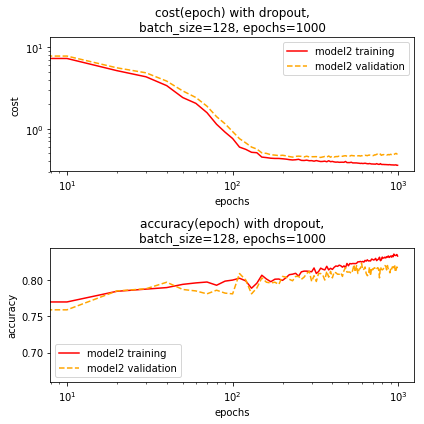

In [47]:
# %% plot results
fig2, axes = plt.subplots(2, 1, figsize=(6, 6))

x_ticks = np.arange(0, max_epochs_2, display_step_2)

#axes[0].plot(x_ticks, model1.training_costs, color="blue", label="model1 training")
#axes[0].plot(x_ticks, model1.val_costs, color="blue", label="model1 test",linestyle="dashed")
axes[0].plot(x_ticks, model2.training_costs, color="red", label="model2 training")
axes[0].plot(x_ticks, model2.val_costs, color="orange", label="model2 validation", linestyle="dashed")

axes[0].set_xlabel("epochs")
axes[0].set_xscale("log")
axes[0].set_ylabel("cost")
axes[0].set_yscale("log")
#axes[0].set_ylim(0,10000)
axes[0].set_title(
    "cost(epoch) with dropout,\nbatch_size={}, epochs={}".format(batch_size_2, max_epochs_2))
axes[0].legend()

#axes[1].plot(x_ticks, model1.training_accuracy, color="blue", label="model1 training")
#axes[1].plot(x_ticks, model1.val_accuracy, color="blue", label="model1 test",linestyle="dashed")
axes[1].plot(x_ticks, model2.training_accuracy, color="red", label="model2 training")
axes[1].plot(x_ticks, model2.val_accuracy, color="orange", label="model2 validation", linestyle="dashed")

axes[1].set_xlabel("epochs")
axes[1].set_xscale("log")
axes[1].set_ylabel("accuracy")
axes[1].set_title(
    "accuracy(epoch) with dropout,\nbatch_size={}, epochs={}".format(batch_size_2, max_epochs_2))
axes[1].legend()

fig2.tight_layout()
plt.show()

fig2.savefig("higgs_fig2.png", dpi=500)


In [48]:
print("model2 accuracy on test set: {:.3f}".format(model2.score(X_test, y_test)))
#ams only available for all the data
#print("model2 AMS: {:.4f}".format(compute_AMS(model2, X_test)))

model2 accuracy on test set: 0.790


# model3 with 1 layer but with full data and all the features

In [58]:
learning_rate_3 = 0.001
# we need a big dropout in order to contrast the tendency to overfit of a model with a high number of nodes'
keep_probs_3 = (0.5,) 
batch_size_3 = 128
max_epochs_3 = 200
beta_w_3 = 0
beta_b_3 = 0
decay_rate_3 = None #0.96
display_step_3 = 10
n_features_3 = n_features
# %% create model with 1 hidden layers
model3 = MLPClassifier(n_layers=1, n_nodes=(1024,), learning_rate=learning_rate_3, random_seed=None,
                          n_features=n_features_3, n_classes=2)
model3.fit(X_train=X_train, y_train=y_train, max_epochs=max_epochs_3,
           display_step=display_step_3, batch_size=batch_size_3, keep_probs=keep_probs_3, validation_split=0.1,
           beta_w=beta_w_3, beta_b=beta_b_3, decay_rate=decay_rate_3, verbose=True)

starting the fit
progress:   0.00%	train acc=0.8055	val acc=0.8044
progress:   5.00%	train acc=0.8209	val acc=0.8201
progress:  10.00%	train acc=0.8293	val acc=0.8262
progress:  15.00%	train acc=0.8346	val acc=0.8308
progress:  20.00%	train acc=0.8375	val acc=0.8334
progress:  25.00%	train acc=0.8362	val acc=0.8294
progress:  30.00%	train acc=0.8392	val acc=0.8345
progress:  35.00%	train acc=0.8400	val acc=0.8340
progress:  40.00%	train acc=0.8407	val acc=0.8337
progress:  45.00%	train acc=0.8410	val acc=0.8339
progress:  50.00%	train acc=0.8419	val acc=0.8348
progress:  55.00%	train acc=0.8418	val acc=0.8334
progress:  60.00%	train acc=0.8418	val acc=0.8343
progress:  65.00%	train acc=0.8417	val acc=0.8323
progress:  70.00%	train acc=0.8434	val acc=0.8336
progress:  75.00%	train acc=0.8436	val acc=0.8348
progress:  80.00%	train acc=0.8434	val acc=0.8310
progress:  85.00%	train acc=0.8433	val acc=0.8338
progress:  90.00%	train acc=0.8436	val acc=0.8330
progress:  95.00%	train acc=0.843

In [59]:
print("model3 accuracy on train set: {:.3f}".format(model3.score(X_train, y_train)))
print("model3 accuracy on validation set: {:.3f}".format(model3.score(model3.X_val, model3.y_val)))

model3 accuracy on train set: 0.843
model3 accuracy on validation set: 0.835


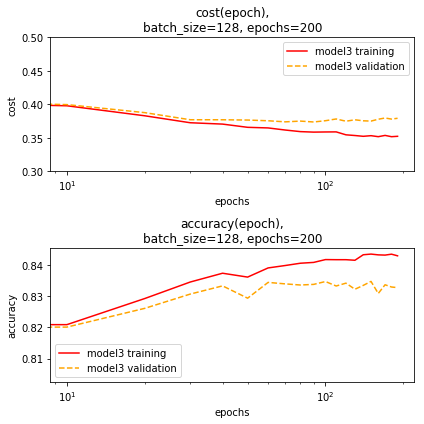

In [66]:
# %% plot results
fig3, axes = plt.subplots(2, 1, figsize=(6, 6))

x_ticks = np.arange(0, max_epochs_3, display_step_3)

#axes[0].plot(x_ticks, model1.training_costs, color="blue", label="model1 training")
#axes[0].plot(x_ticks, model1.val_costs, color="blue", label="model1 test",linestyle="dashed")
axes[0].plot(x_ticks, model3.training_costs, color="red", label="model3 training")
axes[0].plot(x_ticks, model3.val_costs, color="orange", label="model3 validation", linestyle="dashed")

axes[0].set_xlabel("epochs")
axes[0].set_xscale("log")
axes[0].set_ylabel("cost")
axes[0].set_yscale("linear")
axes[0].set_ylim(0.3,0.5)
axes[0].set_title(
    "cost(epoch),\nbatch_size={}, epochs={}".format(batch_size_3, max_epochs_3))
axes[0].legend()

#axes[1].plot(x_ticks, model1.training_accuracy, color="blue", label="model1 training")
#axes[1].plot(x_ticks, model1.val_accuracy, color="blue", label="model1 test",linestyle="dashed")
axes[1].plot(x_ticks, model3.training_accuracy, color="red", label="model3 training")
axes[1].plot(x_ticks, model3.val_accuracy, color="orange", label="model3 validation", linestyle="dashed")

axes[1].set_xlabel("epochs")
axes[1].set_xscale("log")
axes[1].set_ylabel("accuracy")
axes[1].set_title(
    "accuracy(epoch),\nbatch_size={}, epochs={}".format(batch_size_3, max_epochs_3))
axes[1].legend()

fig3.tight_layout()
plt.show()

fig3.savefig("higgs_fig3.png", dpi=500)




In [61]:
print("model3 accuracy on test set: {:.3f}".format(model3.score(X_test, y_test)))
#ams only available for all the data
print("model3 AMS: {:.4f}".format(compute_AMS(model3, X_test)))

model3 accuracy on test set: 0.834
model3 AMS: 0.9823


# model 4 with 3 hidden layers

In [67]:
learning_rate_4 = 0.001
# we need a big dropout in order to contrast the tendency to overfit of a model with a high number of nodes
keep_probs_4 = (0.8, 0.5, 0.5, 0.5) 
batch_size_4 = 128
max_epochs_4 = 200
beta_w_4 = 0.0001
beta_b_4 = 0.0001
decay_rate_4 = None #0.96
display_step_4 = 10
n_features_4 = n_features
# %% create model with 3 hidden layers
model4 = MLPClassifier(n_layers=4, n_nodes=(600,600,600,600), learning_rate=learning_rate_4, random_seed=None,
                          n_features=n_features_4, n_classes=2)
model4.fit(X_train=X_train, y_train=y_train, max_epochs=max_epochs_4,
           display_step=display_step_4, batch_size=batch_size_4, keep_probs=keep_probs_4, validation_split=0.1,
           beta_w=beta_w_4, beta_b=beta_b_4, decay_rate=decay_rate_4, verbose=True)

starting the fit
progress:   0.00%	train acc=0.7612	val acc=0.7602
progress:   5.00%	train acc=0.6569	val acc=0.6609
progress:  10.00%	train acc=0.6569	val acc=0.6609
progress:  15.00%	train acc=0.8303	val acc=0.8306
progress:  20.00%	train acc=0.8254	val acc=0.8233
progress:  25.00%	train acc=0.8329	val acc=0.8297
progress:  30.00%	train acc=0.8336	val acc=0.8323
progress:  35.00%	train acc=0.8338	val acc=0.8326
progress:  40.00%	train acc=0.8365	val acc=0.8334
progress:  45.00%	train acc=0.8378	val acc=0.8353
progress:  50.00%	train acc=0.8382	val acc=0.8360
progress:  55.00%	train acc=0.8328	val acc=0.8320
progress:  60.00%	train acc=0.8356	val acc=0.8351
progress:  65.00%	train acc=0.8369	val acc=0.8364
progress:  70.00%	train acc=0.8371	val acc=0.8366
progress:  75.00%	train acc=0.8373	val acc=0.8360
progress:  80.00%	train acc=0.8363	val acc=0.8372
progress:  85.00%	train acc=0.8374	val acc=0.8360
progress:  90.00%	train acc=0.8368	val acc=0.8353
progress:  95.00%	train acc=0.837

In [68]:
print("model4 accuracy on train set: {:.3f}".format(model4.score(X_train, y_train)))
print("model4 accuracy on validation set: {:.3f}".format(model4.score(model4.X_val, model4.y_val)))

model4 accuracy on train set: 0.837
model4 accuracy on validation set: 0.838


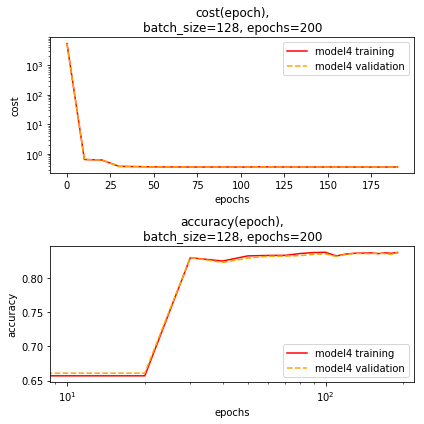

In [69]:
# %% plot results
fig4, axes = plt.subplots(2, 1, figsize=(6, 6))

x_ticks = np.arange(0, max_epochs_4, display_step_4)


axes[0].plot(x_ticks, model4.training_costs, color="red", label="model4 training")
axes[0].plot(x_ticks, model4.val_costs, color="orange", label="model4 validation", linestyle="dashed")

axes[0].set_xlabel("epochs")
axes[0].set_xscale("linear")
axes[0].set_ylabel("cost")
axes[0].set_yscale("log")
#axes[0].set_ylim(0,10000)
axes[0].set_title(
    "cost(epoch),\nbatch_size={}, epochs={}".format(batch_size_4, max_epochs_4))
axes[0].legend()


axes[1].plot(x_ticks, model4.training_accuracy, color="red", label="model4 training")
axes[1].plot(x_ticks, model4.val_accuracy, color="orange", label="model4 validation", linestyle="dashed")

axes[1].set_xlabel("epochs")
axes[1].set_xscale("log")
axes[1].set_ylabel("accuracy")
axes[1].set_title(
    "accuracy(epoch),\nbatch_size={}, epochs={}".format(batch_size_4, max_epochs_4))
axes[1].legend()

fig4.tight_layout()
plt.show()

fig4.savefig("higgs_fig4.png", dpi=500)




In [70]:
print("model4 accuracy on test set: {:.3f}".format(model4.score(X_test, y_test)))
#ams only available for all the data
print("model4 AMS: {:.4f}".format(compute_AMS(model4, X_test)))

model4 accuracy on test set: 0.834
model4 AMS: 0.9615


# model 6 with 1 layer, exponential decay (model5 on the report)

In [107]:
learning_rate_6 = 0.01
# we need a big dropout in order to contrast the tendency to overfit of a model with a high number of nodes'
keep_probs_6 = (0.8,) 
batch_size_6 = 128
max_epochs_6 = 300
beta_w_6 = 0.00005
beta_b_6 = 0.00005
decay_rate_6 = 0.96
decay_steps_6 = 10000 # I want the learning rate to be around 0.001 around the 30% of the optimization process
display_step_6 = 10
n_features_6 = n_features
# %% create model with 3 hidden layers
model6 = MLPClassifier(n_layers=1, n_nodes=(1024,), learning_rate=learning_rate_6, random_seed=None,
                          n_features=n_features_6, n_classes=2)
model6.fit(X_train=X_train, y_train=y_train, max_epochs=max_epochs_6,
           display_step=display_step_6, batch_size=batch_size_6, keep_probs=keep_probs_6, validation_split=None,
           beta_w=beta_w_6, beta_b=beta_b_6, decay_rate=decay_rate_6, decay_steps=decay_steps_6, verbose=True)

starting the fit
progress:   0.00%	train acc=0.3427
progress:   3.33%	train acc=0.8161
progress:   6.67%	train acc=0.8257
progress:  10.00%	train acc=0.8229
progress:  13.33%	train acc=0.8254
progress:  16.67%	train acc=0.8273
progress:  20.00%	train acc=0.8255
progress:  23.33%	train acc=0.8186
progress:  26.67%	train acc=0.8236
progress:  30.00%	train acc=0.8263
progress:  33.33%	train acc=0.8272
progress:  36.67%	train acc=0.8278
progress:  40.00%	train acc=0.8291
progress:  43.33%	train acc=0.8292
progress:  46.67%	train acc=0.8301
progress:  50.00%	train acc=0.8285
progress:  53.33%	train acc=0.8327
progress:  56.67%	train acc=0.8312
progress:  60.00%	train acc=0.8301
progress:  63.33%	train acc=0.8282
progress:  66.67%	train acc=0.8328
progress:  70.00%	train acc=0.8321
progress:  73.33%	train acc=0.8330
progress:  76.67%	train acc=0.8328
progress:  80.00%	train acc=0.8352
progress:  83.33%	train acc=0.8349
progress:  86.67%	train acc=0.8353
progress:  90.00%	train acc=0.8352
pro

In [108]:
print("model6 accuracy on train set: {:.3f}".format(model6.score(X_train, y_train)))
#print("model6 accuracy on validation set: {:.3f}".format(model6.score(model6.X_val, model6.y_val)))

model6 accuracy on train set: 0.836


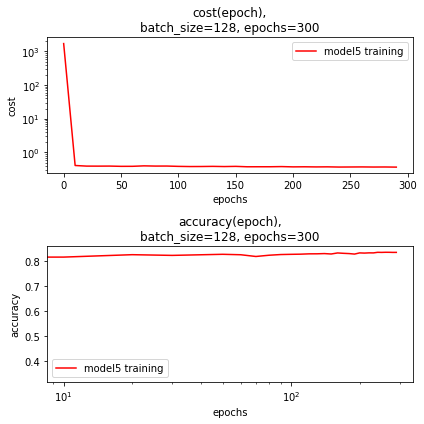

In [112]:
# %% plot results
fig6, axes = plt.subplots(2, 1, figsize=(6, 6))

x_ticks = np.arange(0, max_epochs_6, display_step_6)


axes[0].plot(x_ticks, model6.training_costs, color="red", label="model5 training")
#axes[0].plot(x_ticks, model6.val_costs, color="orange", label="model6 validation", linestyle="dashed")

axes[0].set_xlabel("epochs")
axes[0].set_xscale("linear")
axes[0].set_ylabel("cost")
axes[0].set_yscale("log")
#axes[0].set_ylim(0,10000)
axes[0].set_title(
    "cost(epoch),\nbatch_size={}, epochs={}".format(batch_size_6, max_epochs_6))
axes[0].legend()


axes[1].plot(x_ticks, model6.training_accuracy, color="red", label="model5 training")
#axes[1].plot(x_ticks, model6.val_accuracy, color="orange", label="model6 validation", linestyle="dashed")

axes[1].set_xlabel("epochs")
axes[1].set_xscale("log")
axes[1].set_ylabel("accuracy")
axes[1].set_title(
    "accuracy(epoch),\nbatch_size={}, epochs={}".format(batch_size_6, max_epochs_6))
axes[1].legend()

fig6.tight_layout()
plt.show()

fig6.savefig("higgs_fig6_model5.png", dpi=500)




In [113]:
print("model6 accuracy on test set: {:.3f}".format(model6.score(X_test, y_test)))
#ams only available for all the data
print("model6 AMS: {:.4f}".format(compute_AMS(model6, X_test)))

model6 accuracy on test set: 0.833
model6 AMS: 0.9494


# preproc pca

In [126]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
scaler_pca= StandardScaler()
scaler_pca.fit(X_train_to_scale)

X_train_scaled_pca=scaler_pca.transform(X_train_to_scale)
X_test_scaled_pca=scaler_pca.transform(X_test_to_scale)

n_components_pca = 22
pca = PCA(n_components=n_components_pca)
# fit PCA model to breast cancer data
pca.fit(X_train_scaled_pca)
X_train_pca = pca.transform(X_train_scaled_pca)
X_test_pca = pca.transform(X_test_scaled_pca)

In [127]:
pca.explained_variance_ratio_

array([0.4089089 , 0.0789593 , 0.07724658, 0.06598867, 0.05550759,
       0.05182669, 0.04023842, 0.03749635, 0.03355136, 0.03014907,
       0.0261786 , 0.02176865, 0.01597503, 0.0147592 , 0.01318736,
       0.00972928, 0.00507046, 0.00394501, 0.00316595, 0.00299752,
       0.00213189, 0.00118848])

# model 8 with 3 hidden layers, leaky relu (model6 in the report)

In [133]:
learning_rate_7 = 0.001
# we need a big dropout in order to contrast the tendency to overfit of a model with a high number of nodes'
keep_probs_7 = (0.8, 0.5, 0.5, 0.5) 
batch_size_7 = 64
max_epochs_7 = 1000
beta_w_7 = 0.0005
beta_b_7 = 0.00005
decay_rate_7 = 0.96
decay_steps_7 = 10000 # I want the learning rate to be around 0.0001 around the 30% of the optimization process
display_step_7 = 10
n_features_7 = n_components_pca
# %% create model with 3 hidden layers
model7 = MLPClassifier(n_layers=4, n_nodes=(600,400,400,400), learning_rate=learning_rate_7, random_seed=None,
                          n_features=n_features_7, n_classes=2)
model7.fit(X_train=X_train_pca, y_train=y_train, max_epochs=max_epochs_7,
           display_step=display_step_7, batch_size=batch_size_7, keep_probs=keep_probs_7, validation_split=0.1,
           beta_w=beta_w_7, beta_b=beta_b_7, decay_rate=decay_rate_7, decay_steps=decay_steps_7, verbose=True)

starting the fit
progress:   0.00%	train acc=0.7660	val acc=0.7643
progress:   1.00%	train acc=0.7056	val acc=0.7041
progress:   2.00%	train acc=0.8302	val acc=0.8290
progress:   3.00%	train acc=0.8309	val acc=0.8308
progress:   4.00%	train acc=0.8327	val acc=0.8325
progress:   5.00%	train acc=0.8318	val acc=0.8315
progress:   6.00%	train acc=0.8342	val acc=0.8355
progress:   7.00%	train acc=0.8347	val acc=0.8340
progress:   8.00%	train acc=0.8336	val acc=0.8313
progress:   9.00%	train acc=0.8346	val acc=0.8348
progress:  10.00%	train acc=0.8364	val acc=0.8348
progress:  11.00%	train acc=0.8359	val acc=0.8349
progress:  12.00%	train acc=0.8373	val acc=0.8360
progress:  13.00%	train acc=0.8376	val acc=0.8354
progress:  14.00%	train acc=0.8376	val acc=0.8371
progress:  15.00%	train acc=0.8370	val acc=0.8368
progress:  16.00%	train acc=0.8374	val acc=0.8357
progress:  17.00%	train acc=0.8385	val acc=0.8355
progress:  18.00%	train acc=0.8390	val acc=0.8380
progress:  19.00%	train acc=0.839

In [134]:
print("model7 accuracy on train set: {:.3f}".format(model7.score(X_train_pca, y_train)))
#print("model7 accuracy on validation set: {:.3f}".format(model7.score(model7.X_val, model6.y_val)))

model7 accuracy on train set: 0.842


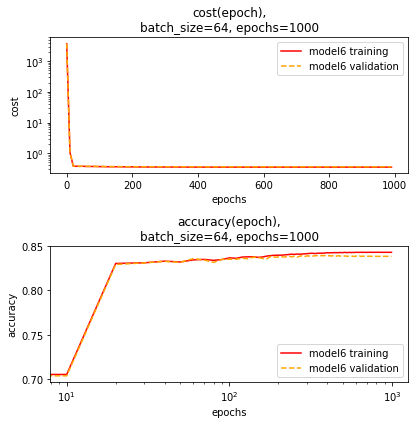

In [137]:
# %% plot results
fig7, axes = plt.subplots(2, 1, figsize=(6, 6))

x_ticks = np.arange(0, max_epochs_7, display_step_7)


axes[0].plot(x_ticks, model7.training_costs, color="red", label="model6 training")
axes[0].plot(x_ticks, model7.val_costs, color="orange", label="model6 validation", linestyle="dashed")

axes[0].set_xlabel("epochs")
axes[0].set_xscale("linear")
axes[0].set_ylabel("cost")
axes[0].set_yscale("log")
#axes[0].set_ylim(0,10000)
axes[0].set_title(
    "cost(epoch),\nbatch_size={}, epochs={}".format(batch_size_7, max_epochs_7))
axes[0].legend()


axes[1].plot(x_ticks, model7.training_accuracy, color="red", label="model6 training")
axes[1].plot(x_ticks, model7.val_accuracy, color="orange", label="model6 validation", linestyle="dashed")

axes[1].set_xlabel("epochs")
axes[1].set_xscale("log")
axes[1].set_ylabel("accuracy")
axes[1].set_title(
    "accuracy(epoch),\nbatch_size={}, epochs={}".format(batch_size_7, max_epochs_7))
axes[1].legend()

fig7.tight_layout()
plt.show()

fig7.savefig("higgs_fig7_model6.png", dpi=500)




In [138]:
print("model7 accuracy on test set: {:.3f}".format(model7.score(X_test_pca, y_test)))
#ams only available for all the data
print("model7 AMS: {:.4f}".format(compute_AMS(model7, X_test_pca)))

model7 accuracy on test set: 0.838
model7 AMS: 0.9993
